# IDENTIFICATION OF MODELS

In [62]:
from warnings import filterwarnings
filterwarnings('ignore')

In [63]:
import pandas as pd 
df = pd.read_csv('train_titanic.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
s = df.isna().sum()
s


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
s = s[s>0]
s

Age         177
Cabin       687
Embarked      2
dtype: int64

# Seprate X and Y 

In [67]:
X = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])

In [68]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [69]:
Y = df[['Survived']]

In [70]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Seprate CAT and CON for X

In [71]:
cat = list(X.columns[X.dtypes=='object'])
cat

['Sex', 'Embarked']

In [72]:
con = list(X.columns[X.dtypes!='object'])
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Creat a PREPROCESSING PIPELINE 

In [73]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [74]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [75]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [76]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [77]:
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [78]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [79]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [80]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


# Apply TRAIN TEST SPLIT

In [81]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y)

In [82]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
319,-1.566107,0.817561,0.432793,0.767630,2.059694,1.0,0.0,1.0,0.0,0.0
235,0.827377,-0.104637,-0.474545,-0.473674,-0.496405,1.0,0.0,0.0,0.0,1.0
32,0.827377,-0.104637,-0.474545,-0.473674,-0.492378,1.0,0.0,0.0,1.0,0.0
502,0.827377,-0.104637,-0.474545,-0.473674,-0.494810,1.0,0.0,0.0,1.0,0.0
762,0.827377,-0.719436,-0.474545,-0.473674,-0.502864,0.0,1.0,1.0,0.0,0.0


In [83]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
464,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
385,-0.369365,-0.873136,-0.474545,-0.473674,0.831478,0.0,1.0,0.0,0.0,1.0
808,-0.369365,0.740711,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
130,0.827377,0.279612,-0.474545,-0.473674,-0.489442,0.0,1.0,1.0,0.0,0.0
571,-1.566107,1.816609,1.340132,-0.473674,0.388096,1.0,0.0,0.0,0.0,1.0


In [84]:
xtrain.shape

(668, 10)

In [85]:
xtest.shape

(223, 10)

# ALGORITHM EVALUATION

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [87]:
dct = {
    
       'logistic': LogisticRegression(),
       'Decision tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier(),
       'Knn': KNeighborsClassifier(),
       'Svm': SVC()
       
       }

In [88]:
dct.items()

dict_items([('logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('Knn', KNeighborsClassifier()), ('Svm', SVC())])

# Fit the Model and Evaluate the Results F1_SCORE

In [89]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [90]:
tr = []
ts = []
tr_cv = []


for name , model in dct.items() :
    
    # Fit the model 
    model.fit(xtrain,ytrain)



    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)



    # Calculate F1 Score
    F1_tr = f1_score(ytrain,ypred_tr)
    F1_ts = f1_score(ytest,ypred_ts)



    # 5 Fold Cross Validation
    scores = cross_val_score(model,xtrain,ytrain,cv=5, scoring='f1_macro')

    F1_cv = scores.mean()



    # Append above results in tr , ts , tr_cv
    tr.append(F1_tr)
    ts.append(F1_ts)
    tr_cv.append(F1_cv)


    # Print above results 

    print(f' Model Name                : {name}')
    print(f' Train F1                  : {F1_tr:.4f}')
    print(f' Train f1 Cross Validation : {F1_cv:.4f}')
    print(f' Test F1                    : {F1_ts:.4f}')
    print('\n====================================\n')


 Model Name                : logistic
 Train F1                  : 0.7415
 Train f1 Cross Validation : 0.7920
 Test F1                    : 0.7176


 Model Name                : Decision tree
 Train F1                  : 0.9780
 Train f1 Cross Validation : 0.7873
 Test F1                    : 0.6966




 Model Name                : Random Forest
 Train F1                  : 0.9782
 Train f1 Cross Validation : 0.8023
 Test F1                    : 0.7283


 Model Name                : Gradient Boost
 Train F1                  : 0.8716
 Train f1 Cross Validation : 0.8241
 Test F1                    : 0.7500


 Model Name                : Knn
 Train F1                  : 0.7908
 Train f1 Cross Validation : 0.7925
 Test F1                    : 0.7219


 Model Name                : Svm
 Train F1                  : 0.7794
 Train f1 Cross Validation : 0.8113
 Test F1                    : 0.7453




# Save above results in DATFRAME

In [91]:
dct

{'logistic': LogisticRegression(),
 'Decision tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier(),
 'Knn': KNeighborsClassifier(),
 'Svm': SVC()}

In [92]:
namess = list(dct.keys())
namess

['logistic', 'Decision tree', 'Random Forest', 'Gradient Boost', 'Knn', 'Svm']

In [93]:
results_dct = {'Model Name ':namess,
               'Train F1':tr,
                'Test F1':ts,
                 'Train F1_CV':F1_cv}

In [94]:
results_df = pd.DataFrame(results_dct)
results_df

,Model Name,Train F1,Test F1,Train F1_CV
0,logistic,0.741483,0.717647,0.811282
1,Decision tree,0.977956,0.696629,0.811282
2,Random Forest,0.978218,0.728324,0.811282
3,Gradient Boost,0.871579,0.750000,0.811282
4,Knn,0.790795,0.721893,0.811282
5,Svm,0.779443,0.745342,0.811282


In [95]:
results_df = results_df.sort_values(by='Test F1',ascending=False)
results_df

,Model Name,Train F1,Test F1,Train F1_CV
3,Gradient Boost,0.871579,0.750000,0.811282
5,Svm,0.779443,0.745342,0.811282
2,Random Forest,0.978218,0.728324,0.811282
4,Knn,0.790795,0.721893,0.811282
0,logistic,0.741483,0.717647,0.811282
1,Decision tree,0.977956,0.696629,0.811282


In [96]:
# So for us gradient boosting has the high score

# Creat a GRADIENT BOOSTING MODEL

In [97]:
best_model = SVC(probability = True)
best_model.fit(xtrain,ytrain)

SVC(probability=True)

In [98]:
model.score(xtrain,ytrain)


0.8458083832335329

In [99]:
model.score(xtest,ytest)

0.8161434977578476

# Predict the results for train and test

In [100]:
ypred_tr = best_model.predict(xtrain)
ypred_tr[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [101]:
ypred_ts = best_model.predict(xtest)
ypred_ts[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [102]:
ytrain.head()

,Survived
319,1
235,0
32,1
502,0
762,1


# Create  a CONFUSION MATRIX

In [103]:
c = best_model.classes_
c

array([0, 1], dtype=int64)

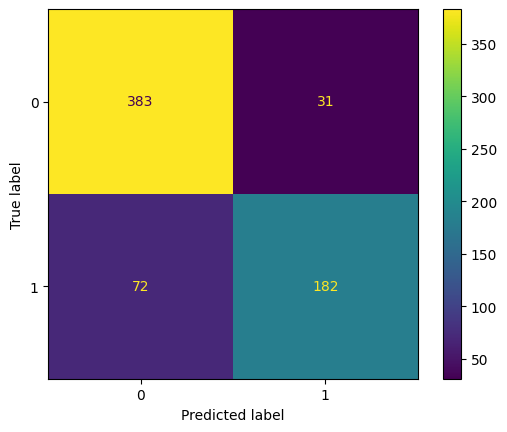

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cf = confusion_matrix(ytrain,ypred_tr)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

# Classification Report

In [105]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,ypred_tr))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       414
           1       0.85      0.72      0.78       254

    accuracy                           0.85       668
   macro avg       0.85      0.82      0.83       668
weighted avg       0.85      0.85      0.84       668



# AUC :- AREA UNDER CURVE

# ROC :- RECIEVER OPREATOR CHARACTERITICS

 showing ROC and AUC curve for both train and tes

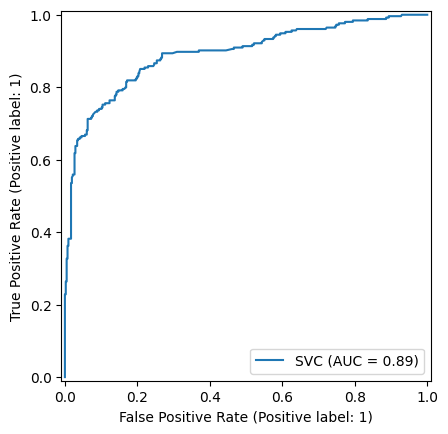

In [106]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

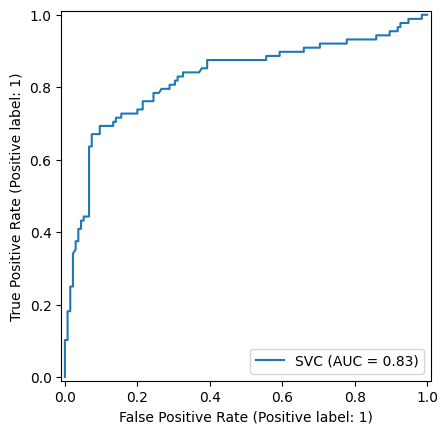

In [107]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

# Cross Validate ROC and AUC score

In [108]:
ra_cv_score = cross_val_score(best_model, xtrain , ytrain , cv =5, scoring='roc_auc')
ra_cv_score.mean()

0.860261291939638

# Predict out of sample data 

In [109]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Transform the above data 

In [113]:
Xnew_pre = pre.transform(xnew)
Xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


# Predict the results 

In [116]:
preds = best_model.predict(Xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [124]:
probs = best_model.predict_proba(Xnew_pre)
probs[0:5]

array([[0.8484532 , 0.1515468 ],
       [0.49109881, 0.50890119],
       [0.86577848, 0.13422152],
       [0.85356508, 0.14643492],
       [0.51590048, 0.48409952]])

In [128]:
import numpy as np 
max_prob = np.max(probs)

# Save above results in data frame

In [125]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [129]:
df_final ['Survived_pred']= preds
df_final ['Survived_prob']= max_prob

In [130]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.944237
1,893,0,0.944237
2,894,0,0.944237
3,895,0,0.944237
4,896,0,0.944237
...,...,...,...
413,1305,0,0.944237
414,1306,1,0.944237
415,1307,0,0.944237
416,1308,0,0.944237


# Save the result sto csv file

In [131]:
df_final.to_csv('Results.csv',index=False)

<Axes: xlabel='Survived_pred'>

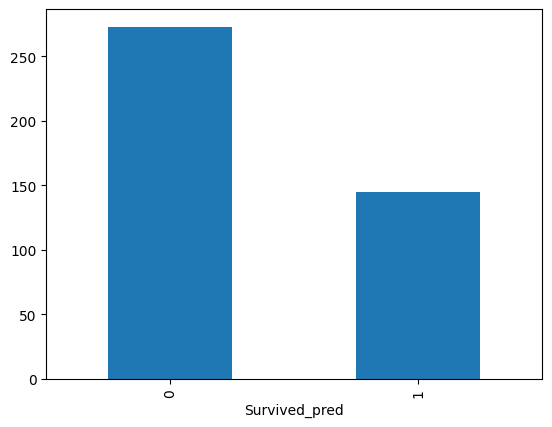

In [133]:
df_final['Survived_pred'].value_counts().plot(kind='bar')